# Nuclear Magnetic Resonance Lab
> April 2021<br>
> MSU Denver<br>
> Junior Lab <br>
> Benjamin Jiron<br>
> Dr. Richard Krantz

## Bloch Equation
<br>
 The spin-lattice relaxation time is defined by the z-component of the Bloch equations:
<div style='margin: 10px 0px 10px 40px'>
    $\frac{dM_z(t)}{dt} = \frac{M_0 - M_z(t)}{T_1}$
</div>
The solution for $M_z = 0$ at $t = 0$ is:
<div style='margin: 10px 0px 10px 40px'>
    $M_z(t) = M_0(1 - e^{-t/T_1})$
</div>
or:
<div style='margin: 10px 0px 20px 40px'>
    $M_r(t) = \frac{M_z(t)}{M_0} = 1 - e^{-t/T_1}$
</div>

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

First, let's just use the equations above to create an 'ideal' dataset and see what the plot looks like:

In [2]:
T1 = 100
t = np.linspace(0, 500, 500)
Mz = 1 - 2*np.exp(-t/T1)

Plotting:

Text(200, -0.25, '$T_1 = 100.0ms$')

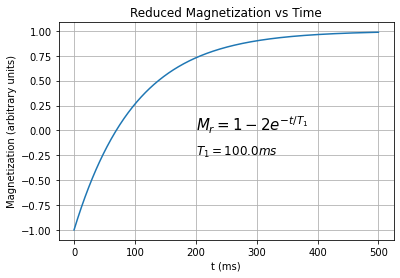

In [3]:
plt.plot(t, Mz)
plt.grid()
plt.title('Reduced Magnetization vs Time')
plt.xlabel('t (ms)')
plt.ylabel('Magnetization (arbitrary units)')
plt.text(200, 0.0, '$M_r = 1 - 2e^{-t/T_1}$', fontsize=15)
plt.text(200, -.25, '$T_1 = 100.0ms$', fontsize=12)

But, the apparatus will only measure positive voltages; here's what it looks like with only absolute values:

Text(200, 0.25, '$T_1 = 100.0 ms$')

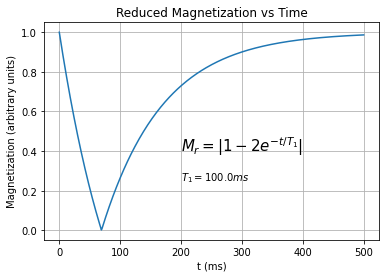

In [4]:
plt.plot(t, np.abs(Mz))
plt.grid()
plt.title('Reduced Magnetization vs Time')
plt.xlabel('t (ms)')
plt.ylabel('Magnetization (arbitrary units)')
plt.text(200, 0.4, '$M_r = |1 - 2e^{-t/T_1}|$', fontsize=15)
plt.text(200, .25, '$T_1 = 100.0 ms$', fontsize=10)

## Data analysis with pseudo-data
Let's generate some noisy test data:

Text(0, 0.5, '|Magnetization| (equivalent units)')

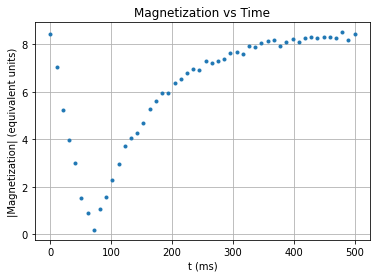

In [5]:
from numpy.random import random as rand
T1 = 100
t = np.linspace(0, 500, 50)
Mz = 8.5*np.abs(1 - 2*np.exp(-t/T1)) + (rand(t.size) - 0.5)/2.5
plt.plot(t, Mz, '.')
plt.grid()
plt.title('Magnetization vs Time')
plt.xlabel('t (ms)')
plt.ylabel('|Magnetization| (equivalent units)')

Now we need to change the sign of the magnetiszation below the minimum:

Text(0, 0.5, 'Magnetization (Equivalent Volts)')

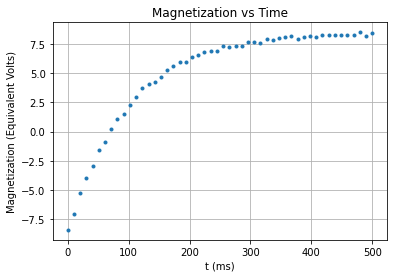

In [6]:
i = np.argmin(Mz)
Mz[:i] = -Mz[:i]
plt.plot(t, Mz, '.')
plt.grid()
plt.title('Magnetization vs Time')
plt.xlabel('t (ms)')
plt.ylabel('Magnetization (Equivalent Volts)')

### Fitting the data

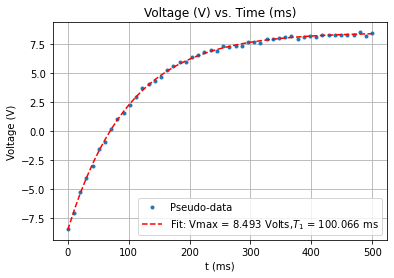

In [7]:
from scipy.optimize import curve_fit
plt.plot(t, Mz, '.', label='Pseudo-data')
plt.title('Voltage (V) vs. Time (ms)')
plt.xlabel('t (ms)')
plt.ylabel('Voltage (V)')
"""
Defining a function to fit
"""
def func(t, Vmax, T1):
    return Vmax*(1 - 2*np.exp(-t/T1))
"""
Set initial guess of fit parameters and curve fit
"""
popt, pcov = curve_fit(func, t, Mz, p0=(8.0, 70.0))
plt.plot(t, func(t, *popt), 'r--', label=f'Fit: Vmax = {round(popt[0], 3)} Volts,'
        f'$T_1$ = {round(popt[1], 3)} ms')
plt.legend()
plt.grid()

#### Errors
<p><i>pcov</i> is the covariance matrix for our fit. To get one standard deviation for each of our parameters, just take the square root of each diagonal element.</p>
<p>Therefore, our estimate of the (1$\sigma$) uncertainty in $V_{max}$ is $\Delta V_{max}$, the first entry in our error, in Volts.</p>
<p>Similarly, our estimate of the (1$\sigma$) uncertainty in $T_1$ is $\Delta T_1$, the second entry in our error, in seconds.</p>

In [8]:
# Errors
np.sqrt(np.diag(pcov))

array([0.02382829, 0.49714969])

# Real Data Analysis
Let's import the data we've got and check it out:

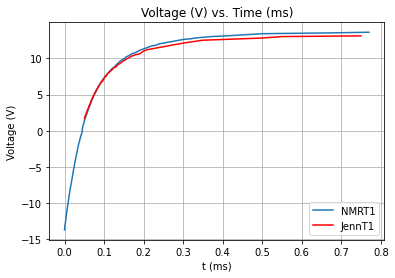

In [9]:
import pandas as pd
names = ['Tau', 'Volts']
df_nmrt = pd.read_csv('NMRT1.csv', header=None, names=names)
df_jenn = pd.read_csv('JennT1.csv', header=None, names=names)
plt.plot(df_nmrt['Tau'], df_nmrt['Volts'], label='NMRT1')
plt.plot(df_jenn['Tau'], df_jenn['Volts'], 'r', label='JennT1')
plt.title('Voltage (V) vs. Time (ms)')
plt.xlabel('t (ms)')
plt.ylabel('Voltage (V)')
plt.legend()
plt.grid()

Let's try and fit the data the same way we did above:

Errors: [0.04712041 0.00031939]


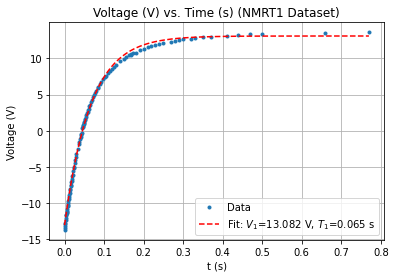

In [10]:
plt.plot(df_nmrt['Tau'], df_nmrt['Volts'], '.', label='Data')
plt.title('Voltage (V) vs. Time (s) (NMRT1 Dataset)')
plt.xlabel('t (s)')
plt.ylabel('Voltage (V)')
#
def func(tau, V1, T1):
    return V1*(1 - 2*np.exp(-tau/T1))
#
popt, pcov = curve_fit(func, df_nmrt['Tau'], df_nmrt['Volts'], p0=(13.0, 0.070))
V_fit = func(df_nmrt['Tau'], *popt)
plt.plot(df_nmrt['Tau'], V_fit, 'r--', label=f'Fit: $V_1$={round(popt[0], 3)} V, $T_1$={round(popt[1], 3)} s')
plt.legend()
plt.grid()
print('Errors:', np.sqrt(np.diag(pcov)))

Hmmm... So that fit function didn't work very well. Let's try a different fit function with two V1's and T1's, as if the experiment contains two different environments (which is certainly possible):

Errors: [0.17426585 0.00888462 0.17211076 0.00059492]


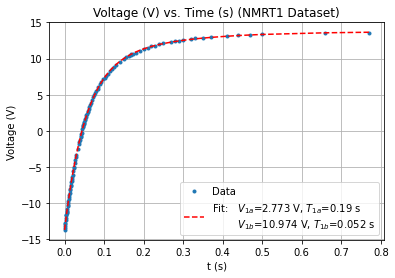

In [11]:
plt.plot(df_nmrt['Tau'], df_nmrt['Volts'], '.', label='Data')
plt.title('Voltage (V) vs. Time (s) (NMRT1 Dataset)')
plt.xlabel('t (s)')
plt.ylabel('Voltage (V)')
#
def func(tau, V1a, T1a, V1b, T1b):
    return V1a*(1 - 2*np.exp(-tau/T1a)) + V1b*(1 - 2*np.exp(-tau/T1b))
#
popt, pcov = curve_fit(func, df_nmrt['Tau'], df_nmrt['Volts'], p0=(13.0, 0.070, 1.0, .005))
V_fit = func(df_nmrt['Tau'], *popt)
plt.plot(df_nmrt['Tau'], V_fit, 'r--', label='Fit:   $V_{1a}$' + f'={round(popt[0], 3)} V, '
         '$T_{1a}$' + f'={round(popt[1], 3)} s\n\t' + '$V_{1b}$'
         f'={round(popt[2], 3)} V, ' + '$T_{1b}$' + f'={round(popt[3], 3)} s')
plt.legend()
plt.grid()
print('Errors:', np.sqrt(np.diag(pcov)))

The fit with two T1s worked pretty well, so apparently the spin lattice is 'seeing' two different environments. That's okay; the mineral oil used in the experiment has impurities so that's to be expected.<br>
Let's check out the other dataset:

Errors: [0.22227637 0.00646671 0.24653106 0.00069941]


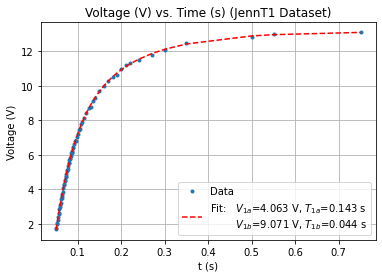

In [12]:
plt.plot(df_jenn['Tau'], df_jenn['Volts'], '.', label='Data')
plt.title('Voltage (V) vs. Time (s) (JennT1 Dataset)')
plt.xlabel('t (s)')
plt.ylabel('Voltage (V)')
#
def func(tau, V1a, T1a, V1b, T1b):
    return V1a*(1 - 2*np.exp(-tau/T1a)) + V1b*(1 - 2*np.exp(-tau/T1b))
#
popt, pcov = curve_fit(func, df_jenn['Tau'], df_jenn['Volts'], p0=(13.0, 0.070, 1.0, .005))
V_fit = func(df_jenn['Tau'], *popt)
plt.plot(df_jenn['Tau'], V_fit, 'r--', label='Fit:   $V_{1a}$' + f'={round(popt[0], 3)} V, '
         '$T_{1a}$' + f'={round(popt[1], 3)} s\n\t' + '$V_{1b}$'
         f'={round(popt[2], 3)} V, ' + '$T_{1b}$' + f'={round(popt[3], 3)} s')
plt.legend()
plt.grid()
print('Errors:', np.sqrt(np.diag(pcov)))